#                                         US ELECTRONIC SALES ANALYSIS

Import libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

Merge Dataset

In [2]:
folder_path = r"C:\Users\OrdiOne\Dropbox\Mon PC (RiMa)\Downloads\sales-analysis-main\sales-analysis-main\dataset"
filenames = [file for file in os.listdir(folder_path)]
print(*filenames, sep='\n')

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
Transaction = pd.DataFrame()

for file in filenames:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    Transaction = pd.concat([Transaction, df])

Transaction.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
Transaction.to_csv(r"C:\Users\OrdiOne\OneDrive\Bureau\internship\Transaction.csv", index=False)

In [5]:
df = pd.read_csv(r'C:\Users\OrdiOne\OneDrive\Bureau\internship\Transaction.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Data Cleaning and Preprocessing

In [6]:
df.shape

(186850, 6)

In [7]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df = df.dropna(how='all')

In [9]:
#df.isna().sum()

In [10]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
tmp = df[df["Order ID"].str[0:2]== 'Or']

In [12]:
tmp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
tmp.shape

(355, 6)

In [14]:
del tmp

In [15]:
#delete tmp rows from the dataset

df = df[df["Order ID"].str[0:2] != 'Or']

In [16]:
df.shape

(185950, 6)

In [17]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [18]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [20]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [21]:
df['Month'] = df['Order Date'].dt.month

In [22]:
df['Month']

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int64

In [23]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [24]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [25]:
# City
def get_city(Address):
    return Address.split(',')[1]

def get_state(Address):
    return Address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [26]:
duplicate_rows = df.duplicated() 

In [27]:
duplicate_rows

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185950, dtype: bool

In [28]:
duplicate_rows = df[df.duplicated()]

In [29]:
duplicate_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA)
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA)
1684,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
3805,180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",4,150.00,Los Angeles (CA)
4196,180576,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001",4,14.95,Dallas (TX)
...,...,...,...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,2019-09-03 11:13:00,"192 Johnson St, San Francisco, CA 94016",9,11.95,San Francisco (CA)
186173,258715,Lightning Charging Cable,1,14.95,2019-09-15 16:50:00,"550 10th St, Portland, OR 97035",9,14.95,Portland (OR)
186508,259035,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016",9,149.99,San Francisco (CA)
186782,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",9,150.00,Dallas (TX)


In [30]:
df = df.drop_duplicates()

In [31]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


Question 1: What was the best month for sales? How much was earned that month?

In [32]:
best_sales_month = df.groupby('Month').sum()
best_sales_month = best_sales_month.sort_values(by='Sales',ascending=False)
best_sales_month[['Sales']]

,Sales
Month,
12,4608295.70
10,3734777.86
4,3389217.98
11,3197875.05
5,3150616.23
3,2804973.35
7,2646461.32
6,2576280.15
8,2241083.37


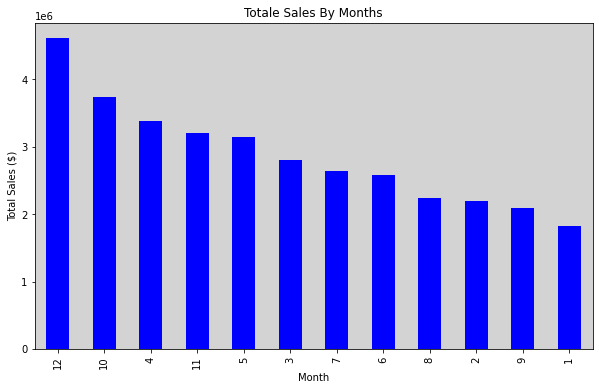

In [33]:
plt.figure(figsize=(10,6))
best_sales_month['Sales'].plot(kind='bar', color='blue')
plt.title('Totale Sales By Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.gca().set_facecolor('lightgrey')
plt.show()

Question 2: What city has the highest sales?

In [34]:
highest_sales_city = df.groupby('City').sum()
highest_sales_city = highest_sales_city.sort_values(by='Sales', ascending=False)
highest_sales_city[['Sales']]

,Sales
City,
San Francisco (CA),8254743.55
Los Angeles (CA),5448304.28
New York City (NY),4661867.14
Boston (MA),3658627.65
Atlanta (GA),2794199.07
Dallas (TX),2765373.96
Seattle (WA),2745046.02
Portland (OR),1870010.56
Austin (TX),1818044.33


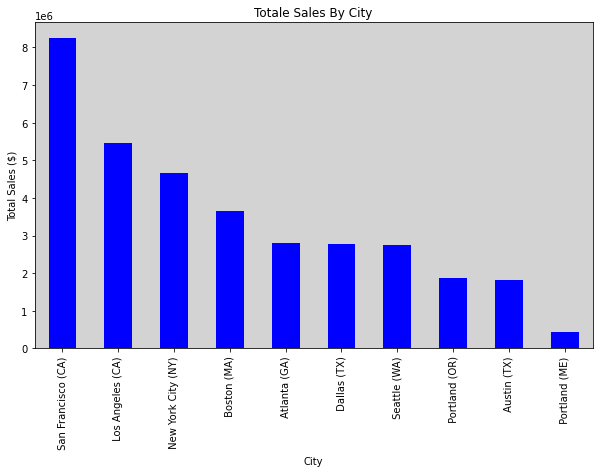

In [35]:
plt.figure(figsize=(10,6))
highest_sales_city['Sales'].plot(kind='bar', color='blue')
plt.title('Totale Sales By City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.gca().set_facecolor('lightgrey')
plt.show()

Question 3: What time should we display advertisements to maximize likehood of customers buying products?

In [36]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [37]:

df['Hour'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute
df

C:\Users\OrdiOne\AppData\Local\Temp\ipykernel_19516\3824099271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\OrdiOne\AppData\Local\Temp\ipykernel_19516\3824099271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minutes'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


In [38]:
adv_time = df.groupby('Hour').count()
adv_time[['Sales']]

,Sales
Hour,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


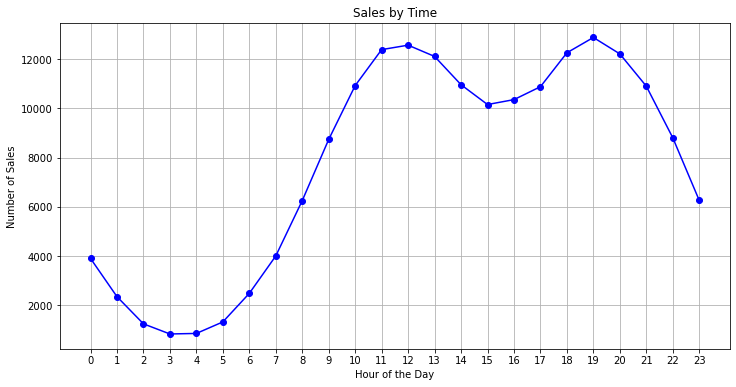

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(adv_time.index, adv_time['Sales'], marker='o', linestyle='-', color='b')

plt.title('Sales by Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.xticks(range(24)) # Set x-axis ticks for all hours (assuming 'Hour' is in integer format)
plt.show()


Question 4: What products are most often sold together?

In [40]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


In [41]:
#Filtering Duplicates
tmp_df = df[df['Order ID'].duplicated(keep=False)]
tmp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [42]:
#Grouping Products by Order ID
tmp_df['prod_group'] = tmp_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
tmp_df['prod_group']

#This line groups the filtered DataFrame by 'Order ID' and transforms each group of products into a comma-separated 
#string, which is then stored in a new 'prod_group' column

C:\Users\OrdiOne\AppData\Local\Temp\ipykernel_19516\459696106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['prod_group'] = tmp_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


3                        Google Phone,Wired Headphones
4                        Google Phone,Wired Headphones
18                   Google Phone,USB-C Charging Cable
19                   Google Phone,USB-C Charging Cable
32                 AAA Batteries (4-pack),Google Phone
                              ...                     
186792    34in Ultrawide Monitor,AA Batteries (4-pack)
186803         Wired Headphones,AAA Batteries (4-pack)
186804         Wired Headphones,AAA Batteries (4-pack)
186841               Google Phone,USB-C Charging Cable
186842               Google Phone,USB-C Charging Cable
Name: prod_group, Length: 14128, dtype: object

In [43]:
tmp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,prod_group
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [44]:
#Removing Duplicate Order ID Entries
tmp_df = tmp_df[['Order ID','prod_group']].drop_duplicates()
tmp_df

,Order ID,prod_group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
186761,259277,"iPhone,Wired Headphones"
186783,259297,"iPhone,Lightning Charging Cable"
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [45]:
#Finding Common Pairs

from itertools import combinations
from collections import Counter

#This loop iterates through each 'prod_group' entry in the DataFrame, splits the comma-separated products into a list,
#and then updates a Counter with combinations of 2 products.
#It essentially counts the occurrences of pairs of products that are ordered together

count = Counter()  # Create an instance of Counter

for row in tmp_df['prod_group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

    
#Displaying the Top 10 Pairs

for key, value in count.most_common(10):
    print(key, value)
#prints the top 10 most common pairs of products along with their occurrence counts.

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [46]:
# For more than 2 items
tmp = df.groupby('Order ID').count().sort_values(by = 'Product', axis =0, ascending=False)
tmp[['Product']]

,Product
Order ID,
160873,5
242936,4
289117,4
312462,4
295681,4
...,...
201930,1
201931,1
201932,1


In [47]:
for comb in range(2,6):
    count = Counter()
    print(f"\n{comb} - items at a time:")
    
    #This loop iterates over combinations of 2 to 5 items at a time
    
    for row in tmp_df['prod_group']:
        row_list = row.split(",")
        count.update(Counter(combinations(row_list, comb)))
    #iterates through each 'prod_group' entry in the tmp_df, splits the comma-separated products into a list, 
    #and counts the occurrences of combinations of comb items using Counter.
    
    for key, value in count.most_common(10):
        print(key, value)
        
    #prints the top 10 most common combinations along with their occurrence counts


2 - items at a time:
('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

3 - items at a time:
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging

Question 5: What product sold the most? Why do you think it sold the most?

In [48]:
top_most_prod_sold = df.groupby('Product').sum()
top_most_prod_sold =top_most_prod_sold.sort_values(by='Quantity Ordered',ascending=False)
top_most_prod_sold[['Quantity Ordered']].head(10)

,Quantity Ordered
Product,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
27in FHD Monitor,7541
iPhone,6847


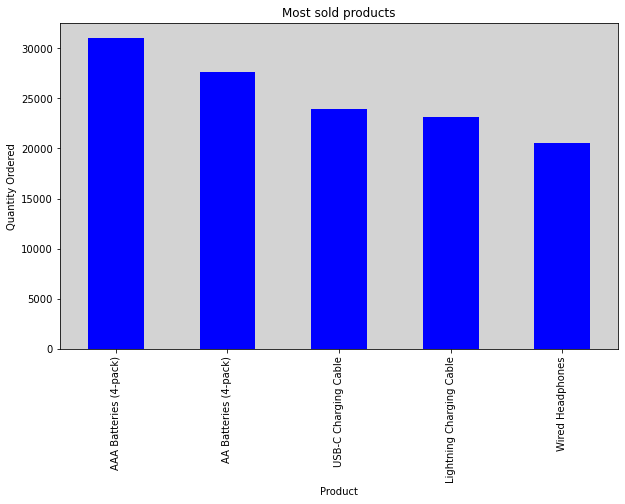

In [49]:
top_most_prod_sold = top_most_prod_sold.head(5)

plt.figure(figsize=(10, 6))
top_most_prod_sold['Quantity Ordered'].plot(kind='bar', color='blue')
plt.title('Most sold products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.gca().set_facecolor('lightgrey')
plt.show()

Question 6 : What are the top products that represents highest revenues? 

In [50]:
top_prod = df.groupby('Product').sum()
top_prod = top_prod.sort_values(by='Sales', ascending=False)  # Fix: Use `True` or `False` instead of 'True' or 'False'
top_prod[['Sales']].head(5)

,Sales
Product,
Macbook Pro Laptop,8032500.00
iPhone,4792900.00
ThinkPad Laptop,4127958.72
Google Phone,3317400.00
27in 4K Gaming Monitor,2433147.61


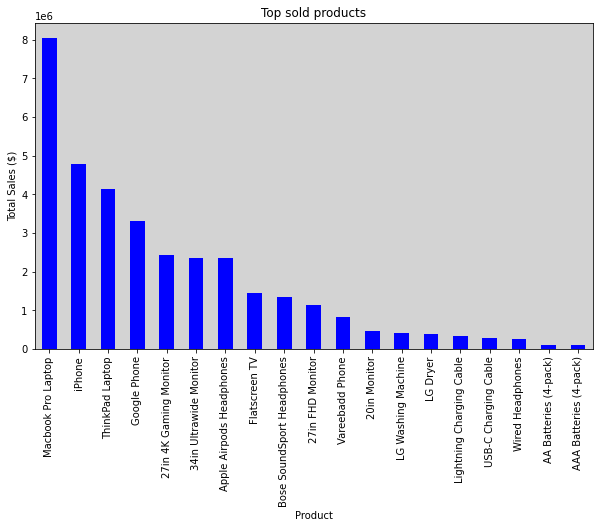

In [51]:
plt.figure(figsize=(10,6))
top_prod['Sales'].plot(kind='bar', color='blue')
plt.title('Top sold products')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.gca().set_facecolor('lightgrey')
plt.show()

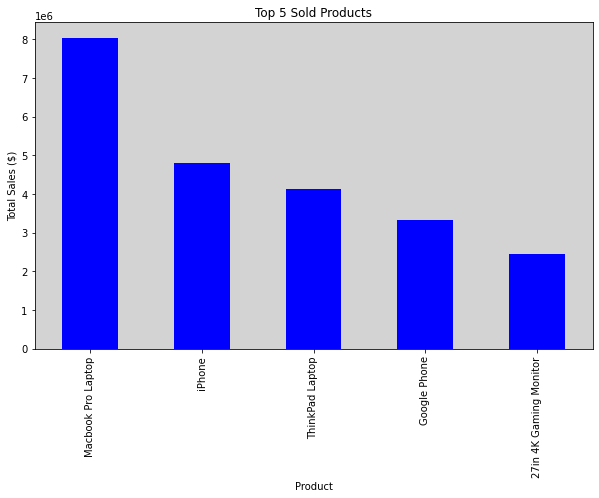

In [52]:
# Select the top five products
top_five_prod = top_prod.head(5)

plt.figure(figsize=(10, 6))
top_five_prod['Sales'].plot(kind='bar', color='blue')
plt.title('Top 5 Sold Products')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.gca().set_facecolor('lightgrey')
plt.show()

In [53]:
df.to_csv(r"C:\Users\OrdiOne\OneDrive\Bureau\internship\sales.csv", index=False)

In [54]:
df.shape

(185686, 11)